# Fourier Transform

In [1]:
import glob, os
from obspy import read, Stream
from obspy.core.trace import Stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
%matplotlib inline 

### Get list of the folders

In [2]:
cwd = os.getcwd()

In [3]:
dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

### Remove unnecessary folder

In [4]:
dirs.remove('.ipynb_checkpoints')

### Get the list of the files inside in a folder

In [5]:
sacs = glob.glob(dirs[0] + '/*')

## Read all sac files 

In [6]:
st_org = Stream()
for sac in sacs:
    st_org += read(sac,format='SAC')

In [7]:
import scipy.fftpack
def fourier(tr,save = False, plotting = False):
    dt = tr.stats.delta
    npts = tr.stats.npts
    
    yf = scipy.fftpack.fft(tr)
    xf = np.linspace(0.0, 1.0/(2.0*dt), npts/2)
    
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/npts * np.abs(yf[:npts//2]),color='k')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequencies')
    plt.ylabel('Amplitudes')
    plt.title(tr.id)
    if save == True:   
        fname = str(tr.stats.starttime.year + tr.stats.starttime.month + tr.stats.starttime.day + '_fft.jpg')
        savefig(fname, dpi=200, bbox_inches='tight')
    if plotting == True:
        plt.show()

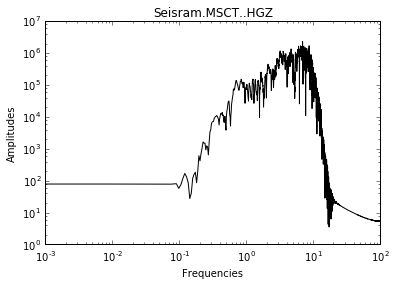

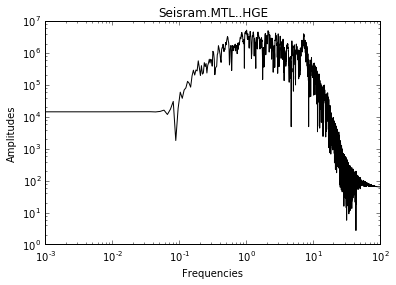

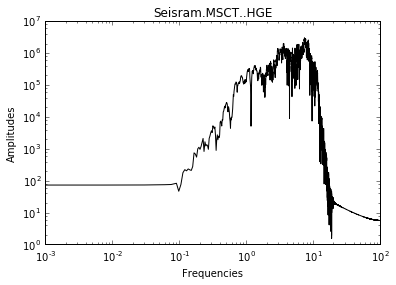

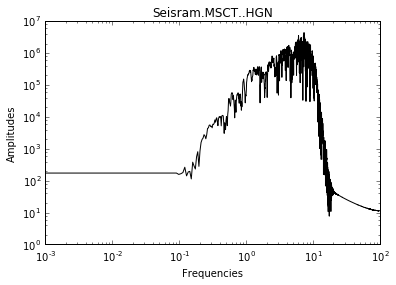

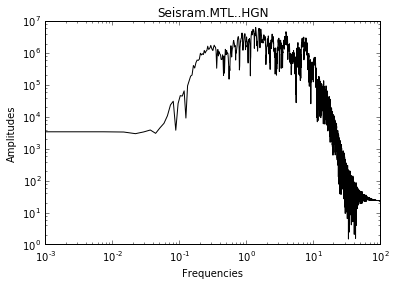

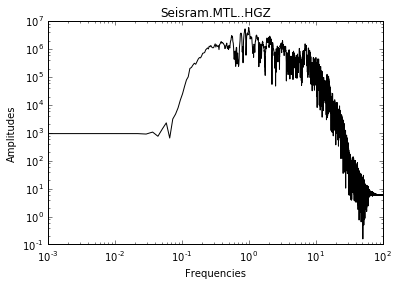

In [8]:
for tr in st_org:
    fourier(tr,plotting = True)